In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [3]:
df.dropna(subset=['CustomerID'], inplace=True)

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df = df[df['Country'] == 'United Kingdom']

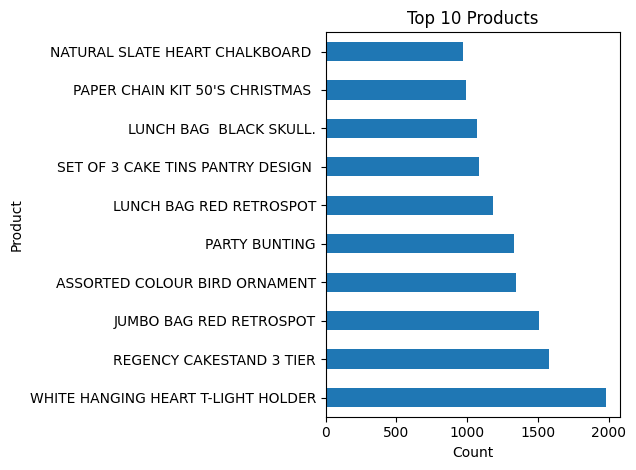

In [7]:
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='barh', title='Top 10 Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [8]:
df.to_csv("../data/cleaned_retail.csv", index=False)

C:\Users\PANDA_BOI\AppData\Local\Temp\ipykernel_8760\3651590869.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\PANDA_BOI\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Association Rules:


,antecedents,consequents,support,confidence,lift
0,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,0.027269,0.598945,14.451925
1,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.027269,0.657971,14.451925
2,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM,0.027509,0.730463,16.390122
3,GARDENERS KNEELING PAD KEEP CALM,GARDENERS KNEELING PAD CUP OF TEA,0.027509,0.617251,16.390122
4,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.024266,0.660131,22.293137
5,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.024266,0.819473,22.293137
6,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.028590,0.777778,19.099148
7,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.028590,0.702065,19.099148
8,HEART OF WICKER SMALL,HEART OF WICKER LARGE,0.023905,0.428879,9.027069
9,HEART OF WICKER LARGE,HEART OF WICKER SMALL,0.023905,0.503161,9.027069


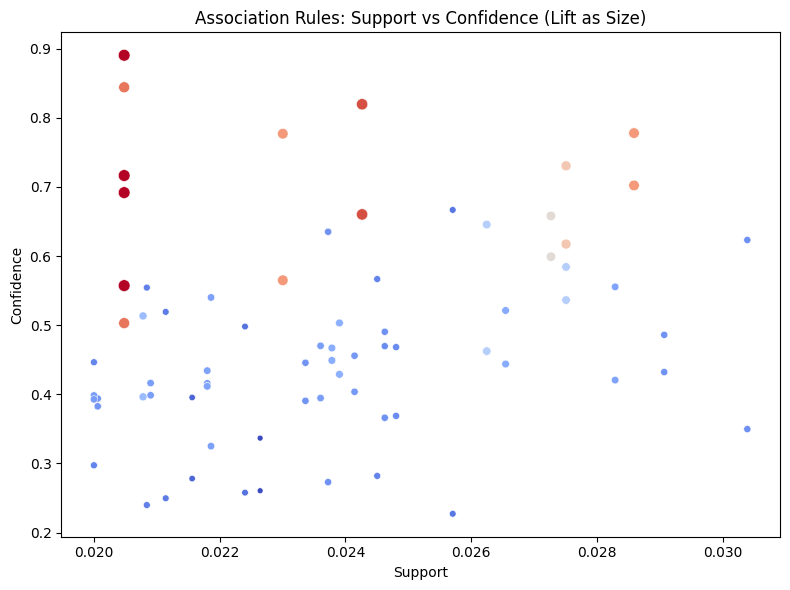

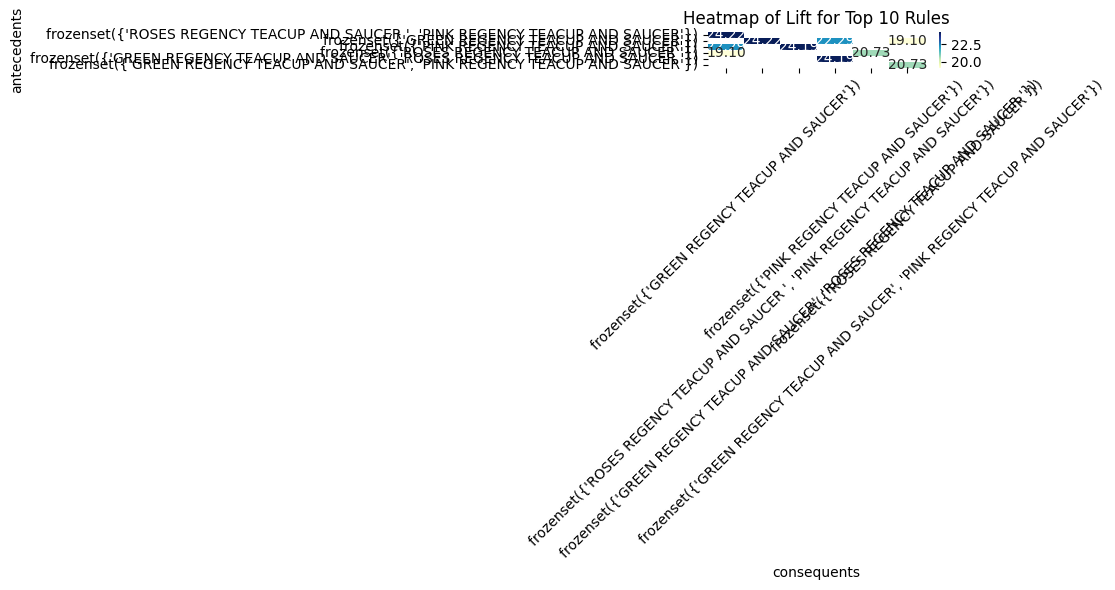

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

basket = (df[df['Quantity'] > 0]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().fillna(0))

basket = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)
rules = rules[rules['confidence'] >= 0.2]

top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

print("Top 10 Association Rules:")
display(top_rules)

plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='coolwarm', legend=False)
plt.title('Association Rules: Support vs Confidence (Lift as Size)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

top10_lift = rules.sort_values('lift', ascending=False).head(10)
pivot = top10_lift.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Lift for Top 10 Rules')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


,Cluster,Recency,Frequency,Monetary,CustomerID
0,0,243.982178,1.855446,423.896437,1010
1,1,39.733813,5.616307,1706.752074,2919
2,2,1.333333,173.666667,27042.243333,3
3,3,6.444444,59.333333,70922.331111,18


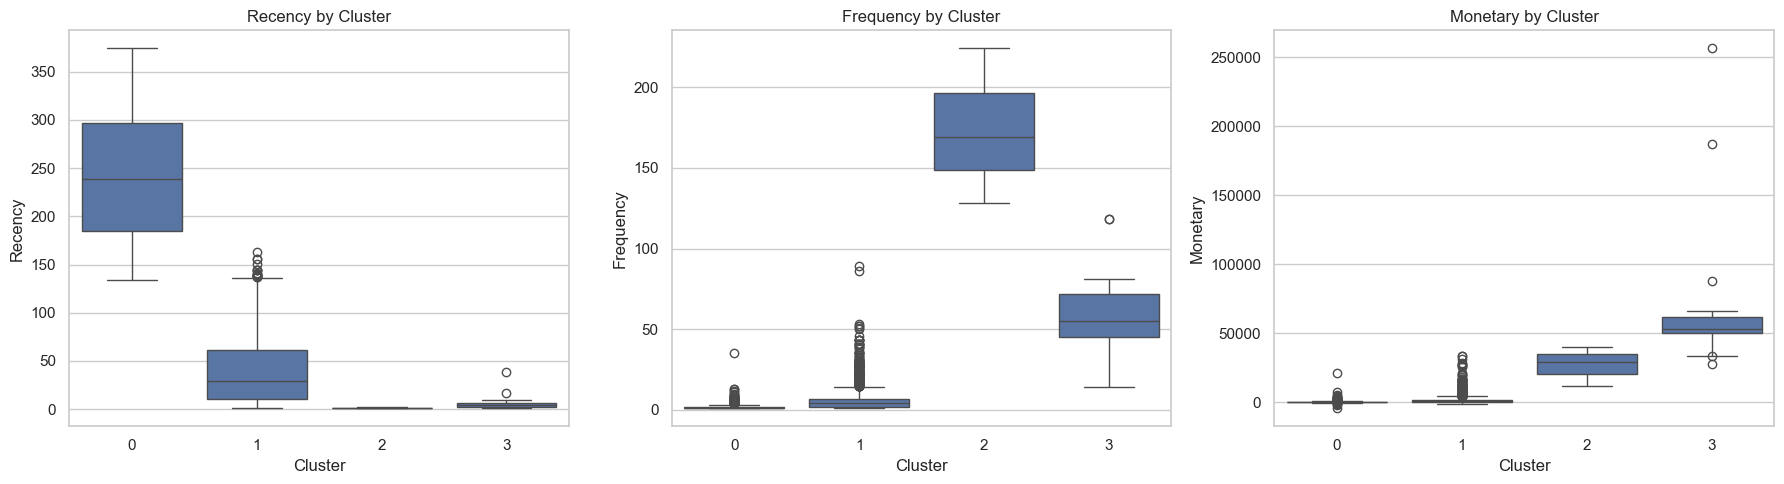

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('../data/cleaned_retail.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

from IPython.display import display
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()
display(cluster_summary)

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Cluster', y='Recency', data=rfm, ax=axes[0])
axes[0].set_title("Recency by Cluster")

sns.boxplot(x='Cluster', y='Frequency', data=rfm, ax=axes[1])
axes[1].set_title("Frequency by Cluster")

sns.boxplot(x='Cluster', y='Monetary', data=rfm, ax=axes[2])
axes[2].set_title("Monetary by Cluster")

plt.tight_layout()
plt.show()
